In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import time

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
print("Veri Seti Bilgisi:")
print(df.info())
print("\nİlk 5 Satır:")
print(df.head())


Veri Seti Bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

İlk 5 Satır:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0 

In [4]:
print("\nEksik Veri Sayısı:")
print(df.isnull().sum())


Eksik Veri Sayısı:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [15]:
print("\nHedef Değişken (target) Değer Dağılımı:")
print(df['target'].value_counts())


Hedef Değişken (target) Değer Dağılımı:
target
1    526
0    499
Name: count, dtype: int64


In [16]:
X = df.drop(columns=["target"])
y = df["target"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [18]:
# Model Eğitimi (Scikit-learn Logistic Regression)
start_time = time.time()
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Eğitim Süresi: {training_time:.4f} saniye")

Eğitim Süresi: 0.1007 saniye


In [19]:
# Tahmin
start_time = time.time()
y_preds = model.predict(X_test)
prediction_time = time.time() - start_time
print(f"Tahmin Süresi: {prediction_time:.4f} saniye")

Tahmin Süresi: 0.0030 saniye


In [20]:
# Model Doğruluğu
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.8146


In [21]:
# Karmaşıklık Matrisi ve Sınıflandırma Raporu
cm = confusion_matrix(y_test, y_preds)
print("\nKarmaşıklık Matrisi:")
print(cm)

print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_preds))


Karmaşıklık Matrisi:
[[70 30]
 [ 8 97]]

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.90      0.70      0.79       100
           1       0.76      0.92      0.84       105

    accuracy                           0.81       205
   macro avg       0.83      0.81      0.81       205
weighted avg       0.83      0.81      0.81       205



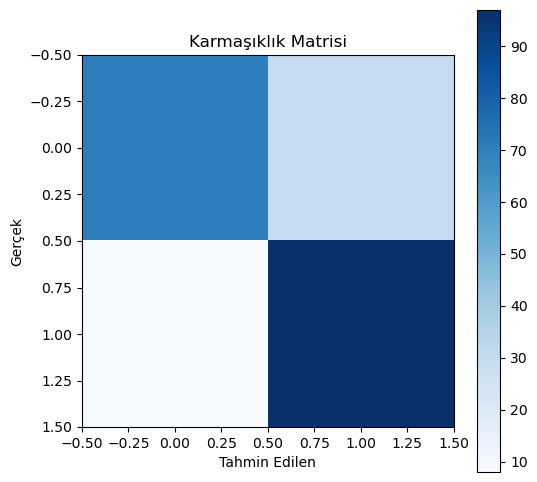

In [22]:
# Grafik 1: Karmaşıklık Matrisi Görselleştirme
plt.figure(figsize=(6, 6))
plt.imshow(cm, cmap="Blues", interpolation="nearest")
plt.title("Karmaşıklık Matrisi")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.colorbar()
plt.show()

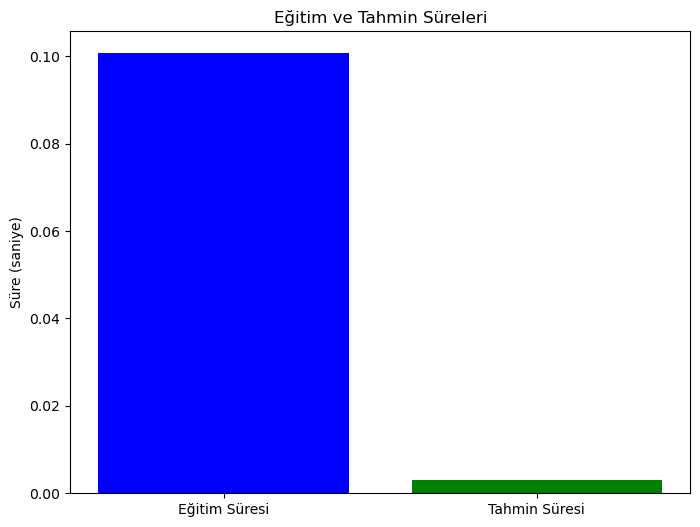

In [23]:
# Grafik 2: Eğitim Süresi ve Tahmin Süresi
labels = ['Eğitim Süresi', 'Tahmin Süresi']
times = [training_time, prediction_time]

plt.figure(figsize=(8, 6))
plt.bar(labels, times, color=['blue', 'green'])
plt.title("Eğitim ve Tahmin Süreleri")
plt.ylabel("Süre (saniye)")
plt.show()
